# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the bag of words technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the Bag of Words Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook

Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews

## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

In [3]:
import pandas as pd
import numpy as np

In [4]:
train_df = pd.read_csv('/content/train.tsv.zip', sep='\t')
test_df = pd.read_csv('/content/test.tsv.zip', sep='\t')
sub_df = pd.read_csv('/content/sampleSubmission.csv')

In [5]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [6]:
train_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train_df.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [9]:
train_df['Sentiment'].value_counts()

,count
Sentiment,
2,79582
3,32927
1,27273
4,9206
0,7072


In [10]:
train_df['Sentiment'].value_counts(normalize=True)

,proportion
Sentiment,
2,0.509945
3,0.210989
1,0.174760
4,0.058990
0,0.045316


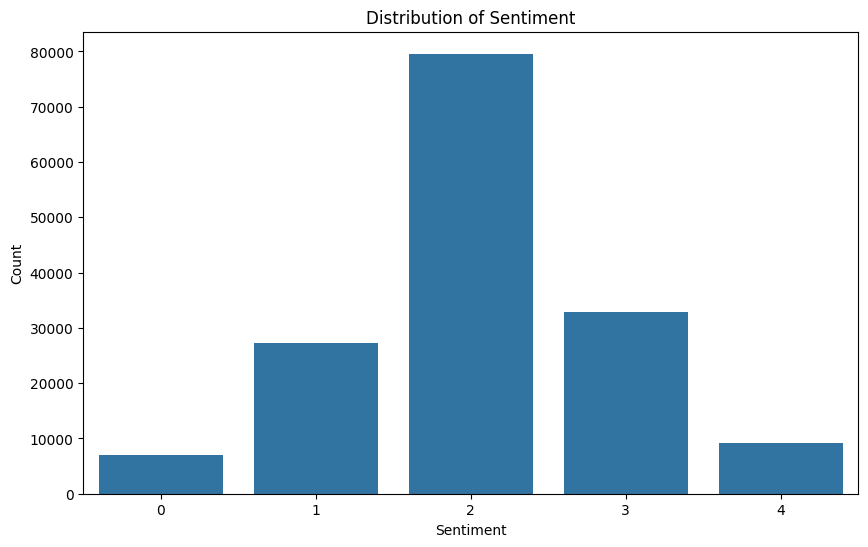

In [11]:
# prompt: plot a bar graph o ftain_df sentence id vs sentiment

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x=train_df['Sentiment'].value_counts().index, y=train_df['Sentiment'].value_counts().values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')
plt.show()

Summarize your insights and learnings from the dataset below:

* Distribution is mainly focused on 5 ratings
* Average (Not negative - not positive) having the highest counts
* Every sentence has a Id and part of the sentence may have different rating and is mentioned seperately with same Id

## Implement Bag of Words Model

Outline:

1. Learn the vocabulary using `CountVectorizer`
3. Transform training and test data

In [12]:
#tokenise the data and words
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
#Get all the first forms of the words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
english_stopwords = stopwords.words('english')
def remove_stopwords(tokens):
  return [word for word in tokens if word not in english_stopwords]

In [15]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

In [16]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
def tokenize(text):
  return [stemmer.stem(word) for word in word_tokenize(text) if word.isalpha()]

In [18]:
vectorizer = CountVectorizer(lowercase = True,
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=1000)

In [19]:
vectorizer.fit(train_df.Phrase)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CountVectorizer(max_features=1000,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x7f63728ca7a0>)

In [20]:
len(vectorizer.vocabulary_)

1000

In [21]:
vectorizer.get_feature_names_out()[:1000]

array(['abil', 'abl', 'abov', 'absurd', 'accept', 'accomplish', 'achiev',
       'across', 'act', 'action', 'actor', 'actress', 'actual', 'adam',
       'adapt', 'add', 'admir', 'admit', 'adult', 'adventur', 'affect',
       'age', 'ago', 'air', 'alien', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'alway', 'amaz', 'ambiti', 'america',
       'american', 'among', 'amount', 'amus', 'ani', 'anim', 'annoy',
       'anoth', 'answer', 'anyon', 'anyth', 'apart', 'appar', 'appeal',
       'appear', 'appreci', 'approach', 'around', 'art', 'artist', 'ask',
       'aspect', 'atmospher', 'attempt', 'attent', 'attract', 'audienc',
       'averag', 'avoid', 'aw', 'away', 'awkward', 'back', 'bad',
       'balanc', 'band', 'bare', 'base', 'basic', 'battl', 'bear', 'beat',
       'beauti', 'becaus', 'becom', 'befor', 'begin', 'behind', 'believ',
       'best', 'better', 'beyond', 'big', 'bit', 'bite', 'bizarr',
       'black', 'bland', 'bodi', 'bond', 'book', 'bore', 'boy', 

In [22]:
inputs = vectorizer.transform(train_df.Phrase)

#Implementing TF-IDF technique here:
### w(x,y) = tf * log(N/df(x))

What this does is it removes all the words that appear in almost all column which doesnt actually give us a result

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
selected_stopwords = english_stopwords[:115]

In [25]:
vectorizer = TfidfVectorizer(tokenizer=tokenize , stop_words=selected_stopwords, ngram_range=(1,2), max_features=2000 )

In [26]:
vectorizer.fit(train_df.Phrase)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', 'need', 'onc', 'onli'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x7f63728ca7a0>)

In [27]:
len(vectorizer.vocabulary_)

2000

In [28]:
vectorizer.get_feature_names_out()[:1000]

array(['abandon', 'abil', 'abil to', 'abl', 'abl to', 'abov', 'absolut',
       'absorb', 'abstract', 'absurd', 'accent', 'accept', 'access',
       'accomplish', 'ach', 'achiev', 'across', 'act', 'action',
       'action film', 'action movi', 'action sequenc', 'actor', 'actress',
       'actual', 'ad', 'adam', 'adam sandler', 'adapt', 'add', 'admir',
       'admit', 'adolesc', 'adult', 'adventur', 'affair', 'affect', 'age',
       'ago', 'ahead', 'aim', 'air', 'alien', 'aliv', 'allen', 'allow',
       'almost', 'alon', 'along', 'alreadi', 'also', 'altern', 'although',
       'alway', 'amateurish', 'amaz', 'ambigu', 'ambit', 'ambiti',
       'america', 'american', 'among', 'amount', 'amus', 'analyz',
       'angst', 'ani', 'ani the', 'anim', 'annoy', 'anoth', 'answer',
       'anyon', 'anyon who', 'anyth', 'apart', 'appar', 'appeal',
       'appeal to', 'appear', 'appreci', 'approach', 'area', 'argu',
       'around', 'arriv', 'art', 'artifici', 'artist', 'ask', 'aspect',
       'aspir

#Transform Training and test data

In [29]:
inputs = vectorizer.transform(train_df.Phrase)

In [30]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.22672932, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.27107452, 0.24064156, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
test_inputs = vectorizer.transform(test_df.Phrase.fillna(''))

In [32]:
test_inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 235603 stored elements and shape (66292, 2000)>

In [33]:
test_inputs.toarray()[0][:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
 TRAIN_SIZE = 110_000

In [35]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = train_df.Sentiment[:TRAIN_SIZE]

In [36]:
train_inputs.shape , train_targets.shape

((110000, 2000), (110000,))

In [38]:
val_train = inputs[TRAIN_SIZE:]
val_targets = train_df.Sentiment[TRAIN_SIZE:]

In [40]:
val_train.shape

(46060, 2000)

#Train Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression(max_iter=1000)

In [43]:
model.fit(train_inputs, train_targets)

LogisticRegression(max_iter=1000)

In [44]:
train_preds = model.predict(train_inputs)

In [45]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

In [46]:
train_targets

,Sentiment
0,1
1,2
2,2
3,2
4,2
...,...
109995,1
109996,0
109997,1
109998,0


In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(train_targets, train_preds)

0.6351818181818182

In [50]:
val_preds = model.predict(val_train)

In [51]:
accuracy_score(val_targets, val_preds)

0.5748154580981328

In [52]:
#So acc in the train data is much higher than val score so this is common in ML